# Experiment 4: Nostalgic Adam algorithm

## Importations

In [16]:
import numpy as np
import torch
import keras 
import pylab as pl
from torcheval.metrics.functional import multiclass_accuracy
from numpy.random import choice
import pandas as pd

## Data

### MNIST Dataset

In [17]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype('float32')/255

### Preprocessing

In [19]:
N = 10000

# Data MNIST
X = torch.from_numpy(train_images[:N,]).float().view(N,1,28,28)
y = torch.from_numpy(train_labels[:N,]).float().to(torch.int64)
X_test = torch.from_numpy(test_images[:N,]).float().view(N,1,28,28)
y_test = torch.from_numpy(test_labels[:N,]).float().to(torch.int64)

## First Model : Convolutional Neural Network (CNN) - LeNet 5

In [20]:
from ModelNostalgic import Net

In [30]:
list_algo = ['ADAM', 'AMS', 'NADAM', 'NOS']

In [22]:
# Some definitions
categorical_cross_entropy = torch.nn.CrossEntropyLoss()

nb_epochs = 50
batch_size = 120
batches_per_epoch = 40

## Performances of the Optimization Algorithms : MNIST Dataset

### Adam

In [23]:
model_ConvNN = Net()
L_adam, A_adam, lt_adam, at_adam = model_ConvNN.training_ADAM(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)

Launching Ada Delta training of model 
 Number of parameters : 107786


Epoch 1 / 50 : Loss train = 0.2429659366607666 | Accu train = 0.932200014591217 | Loss test = 0.22851894795894623 | Accu test = 0.9283000230789185
Epoch 11 / 50 : Loss train = 0.0492643266916275 | Accu train = 0.9846000075340271 | Loss test = 0.09815789759159088 | Accu test = 0.9715999960899353
Epoch 21 / 50 : Loss train = 0.025043847039341927 | Accu train = 0.992900013923645 | Loss test = 0.0846724808216095 | Accu test = 0.9764999747276306
Epoch 31 / 50 : Loss train = 0.01583673246204853 | Accu train = 0.995199978351593 | Loss test = 0.08560379594564438 | Accu test = 0.9778000116348267
Epoch 41 / 50 : Loss train = 0.007841866463422775 | Accu train = 0.9976999759674072 | Loss test = 0.09294438362121582 | Accu test = 0.9779999852180481


### AMS Grad

In [24]:
model_ConvNN = Net()
L_ams, A_ams, lt_ams, at_ams = model_ConvNN.training_AMS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)

Launching AMS Grad training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.31204378604888916 | Accu train = 0.9128000140190125 | Loss test = 0.3299976885318756 | Accu test = 0.9042999744415283
Epoch 11 / 50 : Loss train = 0.06573453545570374 | Accu train = 0.9789999723434448 | Loss test = 0.09158944338560104 | Accu test = 0.9710000157356262
Epoch 21 / 50 : Loss train = 0.035626158118247986 | Accu train = 0.9887999892234802 | Loss test = 0.07500553876161575 | Accu test = 0.9778000116348267
Epoch 31 / 50 : Loss train = 0.01693408004939556 | Accu train = 0.994700014591217 | Loss test = 0.06650591641664505 | Accu test = 0.9804999828338623
Epoch 41 / 50 : Loss train = 0.015242000110447407 | Accu train = 0.9948999881744385 | Loss test = 0.08675891160964966 | Accu test = 0.9776999950408936


### Nadam

In [25]:
model_ConvNN = Net()
L_nadam, A_nadam, lt_nadam, at_nadam = model_ConvNN.training_NADAM(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon=1e-8, verbose=True)

Launching AMS Grad training of model 
 Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.3573150038719177 | Accu train = 0.8934000134468079 | Loss test = 0.3609745502471924 | Accu test = 0.8902000188827515
Epoch 11 / 50 : Loss train = 0.050833288580179214 | Accu train = 0.9857000112533569 | Loss test = 0.09658128768205643 | Accu test = 0.9718999862670898
Epoch 21 / 50 : Loss train = 0.018134018406271935 | Accu train = 0.9945999979972839 | Loss test = 0.07493779808282852 | Accu test = 0.9776999950408936
Epoch 31 / 50 : Loss train = 0.013120429590344429 | Accu train = 0.9945999979972839 | Loss test = 0.09723065048456192 | Accu test = 0.9764999747276306
Epoch 41 / 50 : Loss train = 0.003836424322798848 | Accu train = 0.9988999962806702 | Loss test = 0.10608470439910889 | Accu test = 0.9785000085830688


### Nostalgic Adam

In [26]:
model_ConvNN = Net()
L_nos, A_nos, lt_nos, at_nos = model_ConvNN.training_NOS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, 0.02, 0.9, 1e-5, epsilon=1e-8, verbose=True)

Launching Ada Delta training of model 
 Number of parameters : 107786
Epoch 11 / 50 : Loss train = 0.06288166344165802 | Accu train = 0.9824000000953674 | Loss test = 0.09145056456327438 | Accu test = 0.972000002861023
Epoch 21 / 50 : Loss train = 0.0430966354906559 | Accu train = 0.9878000020980835 | Loss test = 0.0854606106877327 | Accu test = 0.9728000164031982
Epoch 31 / 50 : Loss train = 0.029940305277705193 | Accu train = 0.9921000003814697 | Loss test = 0.08813510835170746 | Accu test = 0.9743000268936157
Epoch 41 / 50 : Loss train = 0.019763335585594177 | Accu train = 0.9952999949455261 | Loss test = 0.09012413769960403 | Accu test = 0.9749000072479248
Epoch 51 / 50 : Loss train = 0.013095402158796787 | Accu train = 0.9970999956130981 | Loss test = 0.09815245121717453 | Accu test = 0.9750999808311462


## Plot Training 

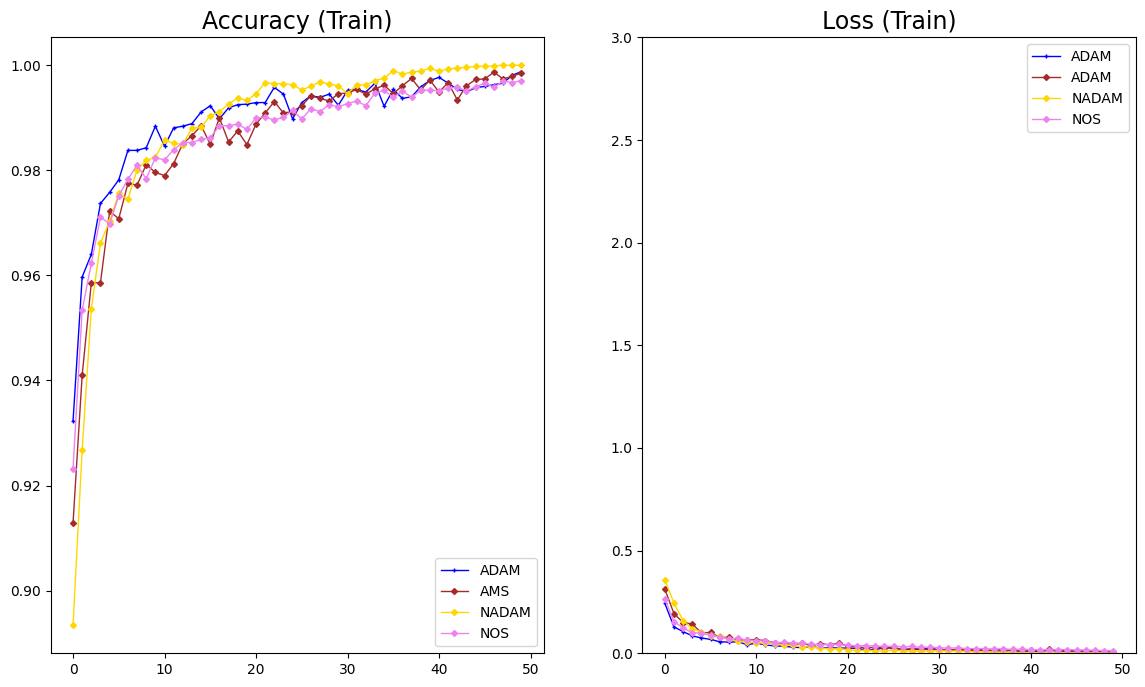

In [27]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

#ax[0].plot(A_gd, 'bo-', markersize=3, linewidth=1, label='GD')
ax[0].plot(A_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_nos, marker='D', color='violet', markersize=3, linewidth=1, label='NOS')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

#ax[1].plot([v.detach().numpy() for v in L_gd], 'bo-', markersize=3, linewidth=1, label='GD')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_nos, marker='D', color='violet', markersize=3, linewidth=1, label='NOS')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,3)
ax[1].legend()

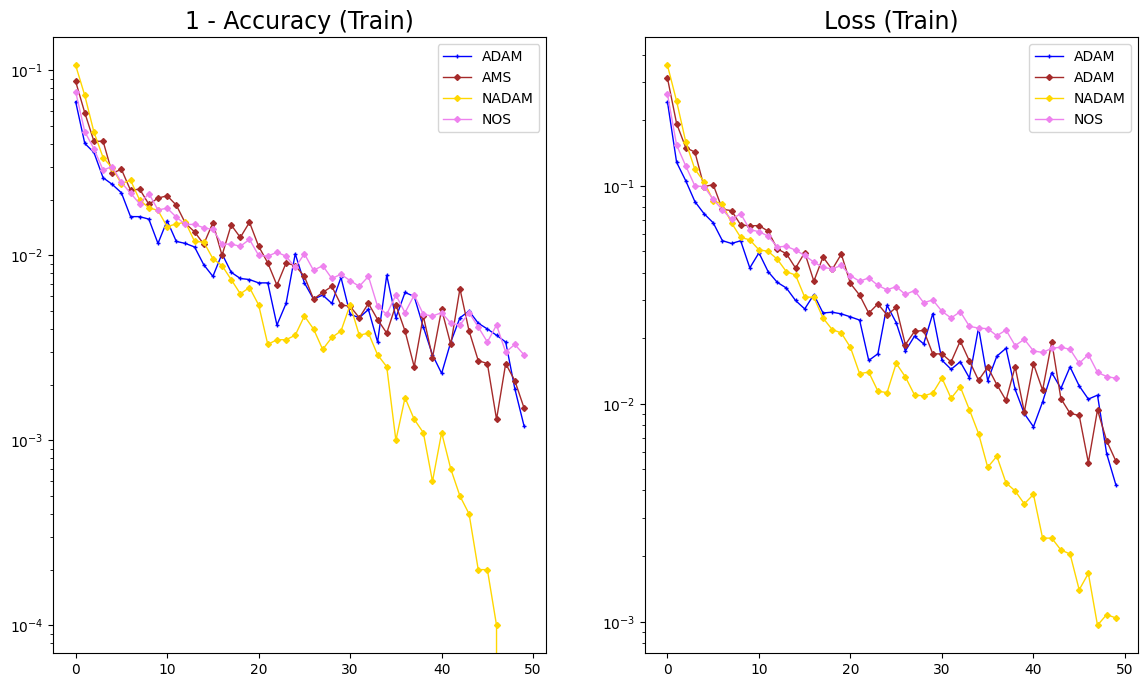

In [28]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

#ax[0].plot(A_gd, 'bo-', markersize=3, linewidth=1, label='GD')
ax[0].plot(1-np.array(A_adam), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_nos), marker='D', color='violet', markersize=3, linewidth=1, label='NOS')
ax[0].set_title("1 - Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

#ax[1].plot([v.detach().numpy() for v in L_gd], 'bo-', markersize=3, linewidth=1, label='GD')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_nos, marker='D', color='violet', markersize=3, linewidth=1, label='NOS')
ax[1].set_title("Loss (Train)", size=17)
# ax[1].set_ylim(0,3)
ax[1].set_yscale('log')
ax[1].legend()

In [31]:
list_test_loss = [lt_adam, lt_ams, lt_nadam, lt_nos]
list_test_accu = [at_adam, at_ams, at_nadam, at_nos]
dico = {'Name':list_algo, 'Loss':list_test_loss, 'Accuracy':list_test_accu}
df_mnist = pd.DataFrame(dico)
df_mnist

,Name,Loss,Accuracy
0,ADAM,"[tensor(0.2285), tensor(0.1361), tensor(0.1213...","[tensor(0.9283), tensor(0.9570), tensor(0.9610..."
1,AMS,"[tensor(0.3300), tensor(0.1966), tensor(0.1632...","[tensor(0.9043), tensor(0.9395), tensor(0.9520..."
2,NADAM,"[tensor(0.3610), tensor(0.2716), tensor(0.1804...","[tensor(0.8902), tensor(0.9219), tensor(0.9441..."
3,NOS,"[tensor(0.2417), tensor(0.1496), tensor(0.1292...","[tensor(0.9259), tensor(0.9507), tensor(0.9607..."
